In [1]:
import torch
import torch.utils.data as data_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
diamonds_data = pd.read_csv("datasets/diamonds.csv", index_col=0)

diamonds_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
diamonds_data.shape

(53940, 10)

In [4]:
diamonds_data = diamonds_data.sample(5000, replace=False)

In [5]:
diamonds_data["cut"].value_counts()

Ideal        1990
Premium      1299
Very Good    1142
Good          432
Fair          137
Name: cut, dtype: int64

In [6]:
diamonds_data["color"].value_counts()

G    1084
E     913
F     851
H     764
D     636
I     501
J     251
Name: color, dtype: int64

In [7]:
diamonds_data["clarity"].value_counts()

SI1     1169
VS2     1150
SI2      858
VS1      764
VVS2     461
VVS1     370
IF       156
I1        72
Name: clarity, dtype: int64

In [8]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.783618,61.730620,57.438560,3823.538400,5.697238,5.699658,3.516806
std,0.467913,1.404153,2.201579,3896.147883,1.117720,1.110199,0.690949
min,0.210000,43.000000,52.000000,326.000000,0.000000,0.000000,0.000000
25%,0.390000,61.000000,56.000000,905.000000,4.680000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,2309.000000,5.660000,5.660000,3.490000
75%,1.040000,62.500000,59.000000,5229.250000,6.530000,6.530000,4.030000
max,4.010000,69.700000,73.000000,18736.000000,10.020000,9.940000,6.240000


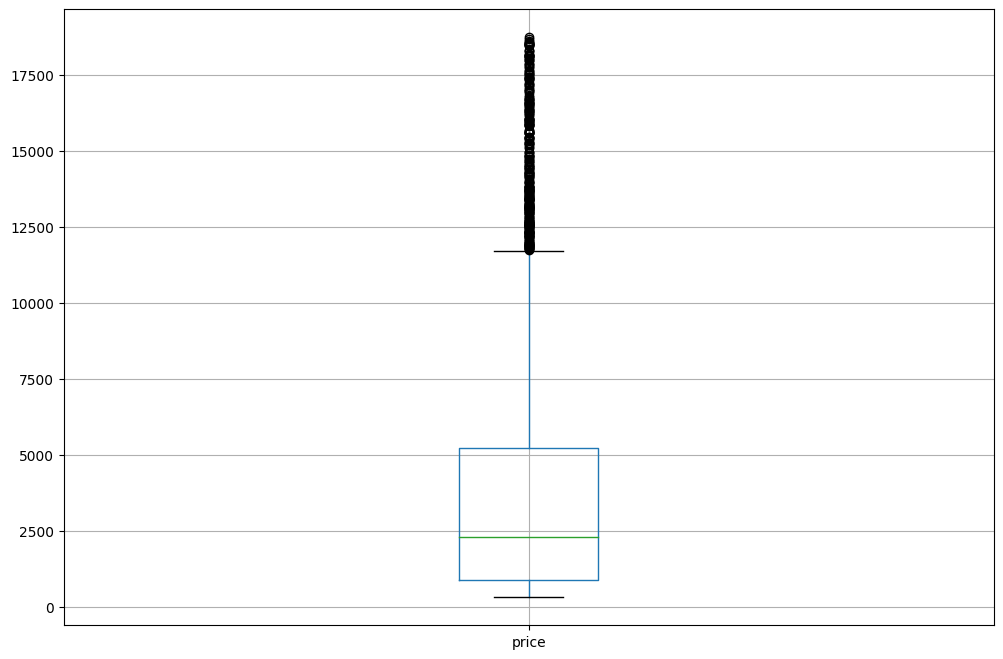

In [9]:
plt.figure(figsize=(12, 8))

diamonds_data.boxplot("price")

plt.show()

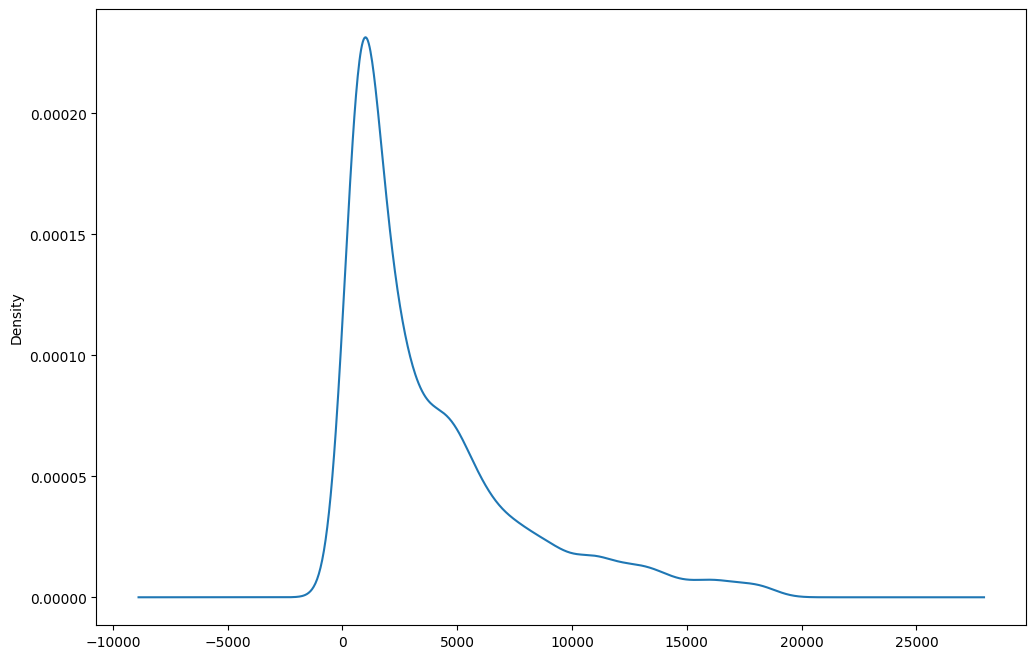

In [10]:
plt.figure(figsize=(12, 8))

diamonds_data["price"].plot.kde()

plt.show()

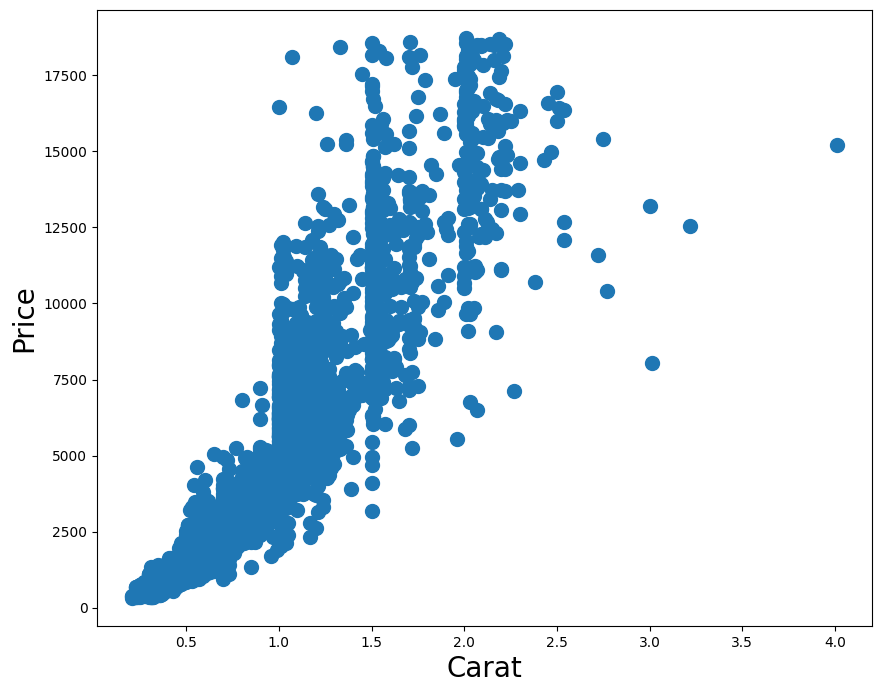

In [11]:
plt.figure(figsize=(10, 8))

plt.scatter(diamonds_data["carat"], diamonds_data["price"], s=100)

plt.xlabel("Carat", fontsize=20)
plt.ylabel("Price", fontsize=20)

plt.show()

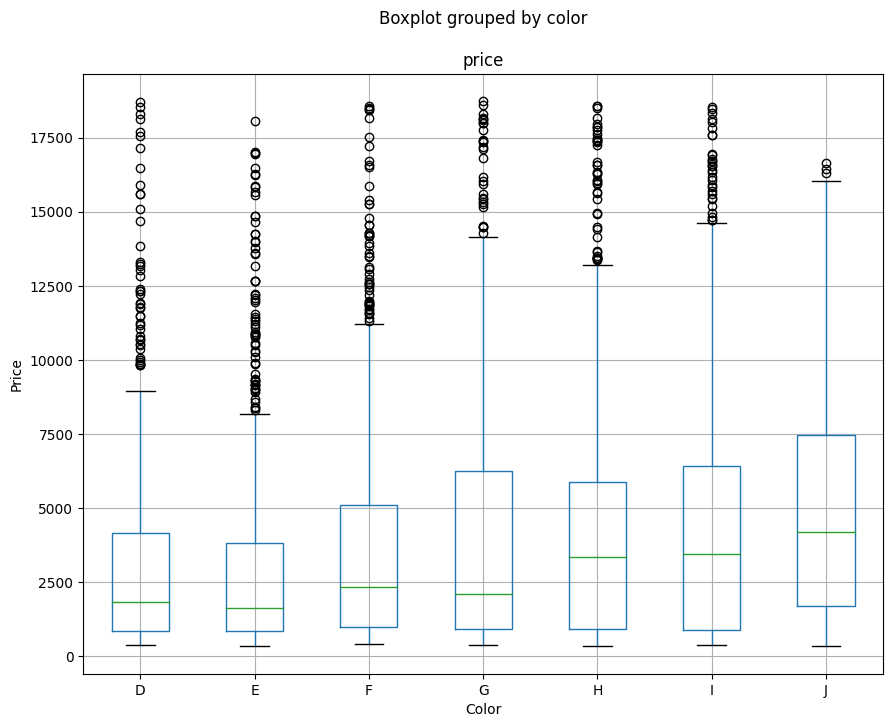

In [12]:
diamonds_data.boxplot("price", "color", figsize=(10, 8))

plt.xlabel("Color")
plt.ylabel("Price")

plt.show()

In [13]:
diamonds_data_corr = diamonds_data.corr()

diamonds_data_corr

C:\Users\natha\AppData\Local\Temp\ipykernel_20884\710583191.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds_data_corr = diamonds_data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.023153,0.179735,0.920311,0.975018,0.974564,0.972541
depth,0.023153,1.000000,-0.300039,-0.015700,-0.027853,-0.029887,0.089192
table,0.179735,-0.300039,1.000000,0.125738,0.193602,0.186232,0.152875
price,0.920311,-0.015700,0.125738,1.000000,0.886702,0.888980,0.880528
x,0.975018,-0.027853,0.193602,0.886702,1.000000,0.998592,0.990109
y,0.974564,-0.029887,0.186232,0.888980,0.998592,1.000000,0.990078
z,0.972541,0.089192,0.152875,0.880528,0.990109,0.990078,1.000000


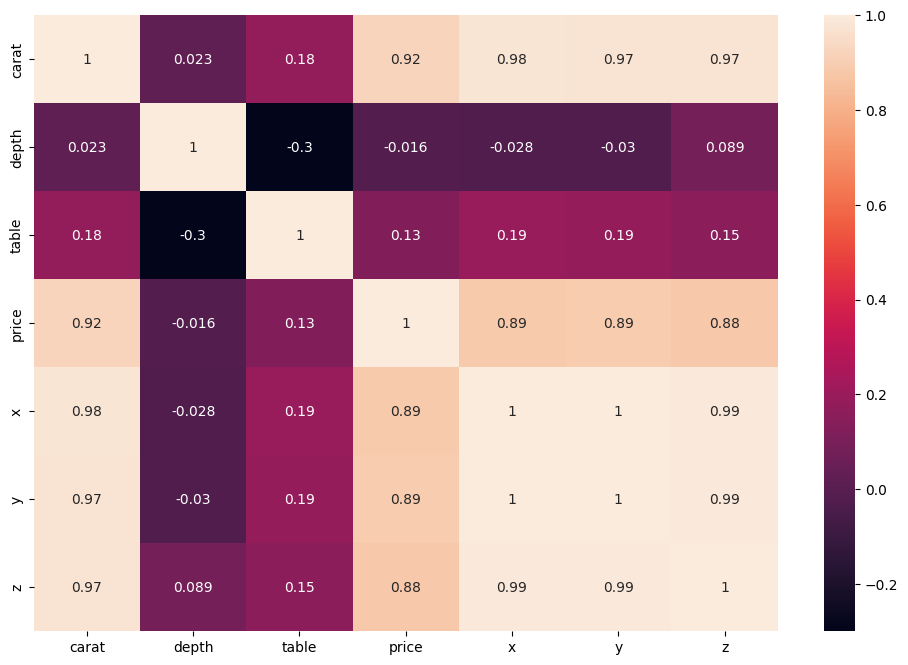

In [14]:
plt.subplots(figsize=(12, 8))

sns.heatmap(diamonds_data_corr, annot=True)

plt.show()

In [15]:
features = diamonds_data.drop("price", axis=1)

target = diamonds_data[["price"]]

In [16]:
features.head()

,carat,cut,color,clarity,depth,table,x,y,z
23026,0.30,Very Good,G,VVS2,60.3,57.0,4.35,4.36,2.63
17370,1.39,Good,F,SI2,63.8,55.0,7.05,7.08,4.51
5038,1.03,Premium,I,SI1,62.0,58.0,6.46,6.41,3.99
47987,0.25,Very Good,E,VVS2,61.1,61.0,4.03,4.06,2.47
53018,0.71,Good,G,VS2,64.2,58.0,5.59,5.62,3.60


In [17]:
categorical_features = features[["color", "cut", "clarity"]].copy()

categorical_features.head()

,color,cut,clarity
23026,G,Very Good,VVS2
17370,F,Good,SI2
5038,I,Premium,SI1
47987,E,Very Good,VVS2
53018,G,Good,VS2


In [18]:
numeric_features = features.drop(["color", "cut", "clarity"], axis=1)

numeric_features.head()

,carat,depth,table,x,y,z
23026,0.30,60.3,57.0,4.35,4.36,2.63
17370,1.39,63.8,55.0,7.05,7.08,4.51
5038,1.03,62.0,58.0,6.46,6.41,3.99
47987,0.25,61.1,61.0,4.03,4.06,2.47
53018,0.71,64.2,58.0,5.59,5.62,3.60


In [19]:
categorical_features["color"].unique()

array(['G', 'F', 'I', 'E', 'D', 'J', 'H'], dtype=object)

In [20]:
categorical_features["cut"].unique()

array(['Very Good', 'Good', 'Premium', 'Ideal', 'Fair'], dtype=object)

In [21]:
categorical_features["clarity"].unique()

array(['VVS2', 'SI2', 'SI1', 'VS2', 'VVS1', 'VS1', 'IF', 'I1'],
      dtype=object)

In [22]:
color_dict = {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}
categorical_features["color"].replace(color_dict, inplace=True)
categorical_features.head()

,color,cut,clarity
23026,3,Very Good,VVS2
17370,2,Good,SI2
5038,5,Premium,SI1
47987,1,Very Good,VVS2
53018,3,Good,VS2


In [23]:
cut_dict = {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}
categorical_features["cut"].replace(cut_dict, inplace=True)
categorical_features.head()

,color,cut,clarity
23026,3,2,VVS2
17370,2,1,SI2
5038,5,3,SI1
47987,1,2,VVS2
53018,3,1,VS2


In [24]:
clarity_dict = {
    "I1": 0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}
categorical_features["clarity"].replace(clarity_dict, inplace=True)
categorical_features.head()

,color,cut,clarity
23026,3,2,5
17370,2,1,1
5038,5,3,2
47987,1,2,5
53018,3,1,3


In [25]:
numeric_features.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.783618,61.730620,57.438560,5.697238,5.699658,3.516806
std,0.467913,1.404153,2.201579,1.117720,1.110199,0.690949
min,0.210000,43.000000,52.000000,0.000000,0.000000,0.000000
25%,0.390000,61.000000,56.000000,4.680000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,5.660000,5.660000,3.490000
75%,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000
max,4.010000,69.700000,73.000000,10.020000,9.940000,6.240000


In [26]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(
    standardScaler.fit_transform(numeric_features),
    columns=numeric_features.columns,
    index=numeric_features.index,
)

numeric_features.describe()

,carat,depth,table,x,y,z
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-7.815970e-17,3.743139e-15,2.112088e-15,3.716139e-16,-2.941647e-16,1.662670e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.226029e+00,-1.334077e+01,-2.470547e+00,-5.097706e+00,-5.134418e+00,-5.090330e+00
25%,-8.413040e-01,-5.203798e-01,-6.534873e-01,-9.101920e-01,-9.005210e-01,-9.072577e-01
50%,-1.787219e-01,4.941550e-02,-1.992224e-01,-3.331937e-02,-3.572508e-02,-3.879981e-02
75%,5.479810e-01,5.479864e-01,7.093073e-01,7.451288e-01,7.479962e-01,7.428123e-01
max,6.895945e+00,5.676144e+00,7.069015e+00,3.867869e+00,3.819824e+00,3.941632e+00


In [27]:
processed_features = pd.concat(
    [numeric_features, categorical_features], axis=1, ignore_index=True, sort=False
)

processed_features.head()

,0,1,2,3,4,5,6,7,8
23026,-1.033666,-1.018951,-0.199222,-1.205465,-1.206803,-1.283590,3,2,5
17370,1.296058,1.473904,-1.107752,1.210408,1.243452,1.437579,2,1,1
5038,0.526607,0.191864,0.255042,0.682495,0.639897,0.684915,5,3,2
47987,-1.140535,-0.449155,1.617837,-1.491791,-1.477052,-1.515178,1,2,5
53018,-0.157348,1.758801,0.255042,-0.095953,-0.071758,0.120417,3,1,3


In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    processed_features, target, test_size=0.2, random_state=1
)

In [29]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [30]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([4000, 9]), torch.Size([4000, 1]))

In [31]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([1000, 9]), torch.Size([1000, 1]))

In [32]:
x_train_tensor[:5]

tensor([[-0.4780, -0.0930, -0.6535, -0.3912, -0.3420, -0.3717,  1.0000,  4.0000,
          4.0000],
        [-0.1787,  1.1178, -0.6535, -0.0602, -0.0988,  0.0480,  3.0000,  2.0000,
          3.0000],
        [-1.0337,  0.7617, -0.6535, -1.3039, -1.2969, -1.2257,  2.0000,  2.0000,
          2.0000],
        [-1.0123,  0.9041, -0.1992, -1.2323, -1.2158, -1.1388,  3.0000,  2.0000,
          1.0000],
        [-0.5421,  0.9753, -0.6535, -0.4897, -0.4591, -0.3717,  1.0000,  1.0000,
          2.0000]])

In [33]:
y_train_tensor[:5]

tensor([[1773.],
        [2657.],
        [ 500.],
        [ 408.],
        [1355.]])

In [34]:
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = data_utils.DataLoader(train_data, batch_size=500, shuffle=True)

In [35]:
len(train_loader)

8

In [36]:
input_layer = x_train_tensor.shape[1]

output_layer = 1

hidden_layer = 12

loss_fn = torch.nn.MSELoss()

In [37]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_layer, hidden_layer),
    torch.nn.Linear(hidden_layer, output_layer),
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
total_step = len(train_loader)

num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if epoch % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()), flush=True)

Epoch [1/1000], Step [1/8], Loss: 29256582.0000
Epoch [1/1000], Step [2/8], Loss: 30993456.0000
Epoch [1/1000], Step [3/8], Loss: 28665654.0000
Epoch [1/1000], Step [4/8], Loss: 28918182.0000
Epoch [1/1000], Step [5/8], Loss: 26130284.0000
Epoch [1/1000], Step [6/8], Loss: 33558744.0000
Epoch [1/1000], Step [7/8], Loss: 29482266.0000
Epoch [1/1000], Step [8/8], Loss: 31125308.0000
Epoch [21/1000], Step [1/8], Loss: 31160702.0000
Epoch [21/1000], Step [2/8], Loss: 30940246.0000
Epoch [21/1000], Step [3/8], Loss: 28201346.0000
Epoch [21/1000], Step [4/8], Loss: 28557890.0000
Epoch [21/1000], Step [5/8], Loss: 30725072.0000
Epoch [21/1000], Step [6/8], Loss: 28039228.0000
Epoch [21/1000], Step [7/8], Loss: 30765110.0000
Epoch [21/1000], Step [8/8], Loss: 29121872.0000
Epoch [41/1000], Step [1/8], Loss: 31736102.0000
Epoch [41/1000], Step [2/8], Loss: 29555024.0000
Epoch [41/1000], Step [3/8], Loss: 31495196.0000
Epoch [41/1000], Step [4/8], Loss: 31080626.0000
Epoch [41/1000], Step [5/8],

In [39]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=12, bias=True)
  (1): Linear(in_features=12, out_features=1, bias=True)
)

In [40]:
sample = x_test.iloc[10]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print("Predicted price: ", (y_pred.item()))
print("Acutal price: ", (y_test.iloc[10]))

Predicted price:  8380.845703125
Acutal price:  price    11957
Name: 23867, dtype: int64


In [41]:
sample = x_test.iloc[20]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print("Predicted price: ", (y_pred.item()))
print("Acutal price: ", (y_test.iloc[20]))

Predicted price:  3217.63134765625
Acutal price:  price    2337
Name: 51113, dtype: int64


In [42]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [43]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(1000, 1)

In [44]:
y_test.values.shape

(1000, 1)

In [45]:
compare_df = pd.DataFrame({'Actual Price':np.squeeze(y_test.values), 'Predicted price': np.squeeze(y_pred)})

compare_df.sample(10)

,Actual Price,Predicted price
961,8523,7541.608398
914,402,-1350.357056
662,683,-175.095901
832,17099,10447.095703
414,4869,3811.927246
806,4338,4175.702637
764,1190,812.196838
96,5466,7136.203125
650,4679,6073.828613
600,1875,3242.915527


In [46]:
r2_score(y_test, y_pred)

0.779473204010498

In [47]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer), torch.nn.ReLU(), torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [48]:
total_step = len(train_loader)

num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if epoch % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()), flush=True)

Epoch [1/1000], Step [1/8], Loss: 32020720.0000
Epoch [1/1000], Step [2/8], Loss: 24985308.0000
Epoch [1/1000], Step [3/8], Loss: 31163744.0000
Epoch [1/1000], Step [4/8], Loss: 31546146.0000
Epoch [1/1000], Step [5/8], Loss: 31783942.0000
Epoch [1/1000], Step [6/8], Loss: 25696814.0000
Epoch [1/1000], Step [7/8], Loss: 31111220.0000
Epoch [1/1000], Step [8/8], Loss: 29810378.0000
Epoch [21/1000], Step [1/8], Loss: 28257084.0000
Epoch [21/1000], Step [2/8], Loss: 29541212.0000
Epoch [21/1000], Step [3/8], Loss: 31180036.0000
Epoch [21/1000], Step [4/8], Loss: 25792372.0000
Epoch [21/1000], Step [5/8], Loss: 34124988.0000
Epoch [21/1000], Step [6/8], Loss: 31233978.0000
Epoch [21/1000], Step [7/8], Loss: 29320860.0000
Epoch [21/1000], Step [8/8], Loss: 28137080.0000
Epoch [41/1000], Step [1/8], Loss: 32004088.0000
Epoch [41/1000], Step [2/8], Loss: 31072744.0000
Epoch [41/1000], Step [3/8], Loss: 29492932.0000
Epoch [41/1000], Step [4/8], Loss: 27914742.0000
Epoch [41/1000], Step [5/8],

In [49]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)

In [50]:
sample = x_test.iloc[10]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted price: ', (y_pred.item()))
print('Actual price: ', (y_test.iloc[10]))

Predicted price:  8195.32421875
Actual price:  price    11957
Name: 23867, dtype: int64


In [51]:
sample = x_test.iloc[20]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted price: ', (y_pred.item()))
print('Actual price: ', (y_test.iloc[20]))

Predicted price:  3171.318603515625
Actual price:  price    2337
Name: 51113, dtype: int64


In [52]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [53]:
y_pred = y_pred_tensor.detach().numpy()

In [54]:
r2_score(y_test, y_pred)

0.7684768580467737

In [55]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer), torch.nn.ReLU(), torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [56]:
total_step = len(train_loader)

num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if epoch % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()), flush=True)

Epoch [1/1000], Step [1/8], Loss: 29505094.0000
Epoch [1/1000], Step [2/8], Loss: 32423968.0000
Epoch [1/1000], Step [3/8], Loss: 28837914.0000
Epoch [1/1000], Step [4/8], Loss: 23312266.0000
Epoch [1/1000], Step [5/8], Loss: 28634434.0000
Epoch [1/1000], Step [6/8], Loss: 36020740.0000
Epoch [1/1000], Step [7/8], Loss: 29765880.0000
Epoch [1/1000], Step [8/8], Loss: 29610404.0000
Epoch [21/1000], Step [1/8], Loss: 24980274.0000
Epoch [21/1000], Step [2/8], Loss: 28379132.0000
Epoch [21/1000], Step [3/8], Loss: 27360132.0000
Epoch [21/1000], Step [4/8], Loss: 28355514.0000
Epoch [21/1000], Step [5/8], Loss: 25556782.0000
Epoch [21/1000], Step [6/8], Loss: 27494414.0000
Epoch [21/1000], Step [7/8], Loss: 22665896.0000
Epoch [21/1000], Step [8/8], Loss: 29566292.0000
Epoch [41/1000], Step [1/8], Loss: 13537365.0000
Epoch [41/1000], Step [2/8], Loss: 15655316.0000
Epoch [41/1000], Step [3/8], Loss: 15984979.0000
Epoch [41/1000], Step [4/8], Loss: 11104236.0000
Epoch [41/1000], Step [5/8],

In [57]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)

In [58]:
sample = x_test.iloc[10]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted price: ', (y_pred.item()))
print('Actual price: ', (y_test.iloc[10]))

Predicted price:  10292.681640625
Actual price:  price    11957
Name: 23867, dtype: int64


In [59]:
sample = x_test.iloc[20]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted price: ', (y_pred.item()))
print('Actual price: ', (y_test.iloc[20]))

Predicted price:  2215.671142578125
Actual price:  price    2337
Name: 51113, dtype: int64


In [60]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [61]:
y_pred = y_pred_tensor.detach().numpy()

In [62]:
r2_score(y_test, y_pred)

0.9546201932901418

In [63]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer), torch.nn.ReLU(), torch.nn.Dropout(0.4), torch.nn.Linear(hidden_layer, output_layer))

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [64]:
total_step = len(train_loader)

num_epochs = 1000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if epoch % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()), flush=True)

Epoch [1/1000], Step [1/8], Loss: 30200336.0000
Epoch [1/1000], Step [2/8], Loss: 28578230.0000
Epoch [1/1000], Step [3/8], Loss: 28011498.0000
Epoch [1/1000], Step [4/8], Loss: 27536704.0000
Epoch [1/1000], Step [5/8], Loss: 29168752.0000
Epoch [1/1000], Step [6/8], Loss: 29380072.0000
Epoch [1/1000], Step [7/8], Loss: 32952806.0000
Epoch [1/1000], Step [8/8], Loss: 32316572.0000
Epoch [21/1000], Step [1/8], Loss: 28500580.0000
Epoch [21/1000], Step [2/8], Loss: 24072738.0000
Epoch [21/1000], Step [3/8], Loss: 26273988.0000
Epoch [21/1000], Step [4/8], Loss: 27427146.0000
Epoch [21/1000], Step [5/8], Loss: 24595412.0000
Epoch [21/1000], Step [6/8], Loss: 30570670.0000
Epoch [21/1000], Step [7/8], Loss: 25613626.0000
Epoch [21/1000], Step [8/8], Loss: 25799008.0000
Epoch [41/1000], Step [1/8], Loss: 17686072.0000
Epoch [41/1000], Step [2/8], Loss: 17209734.0000
Epoch [41/1000], Step [3/8], Loss: 15092452.0000
Epoch [41/1000], Step [4/8], Loss: 16337829.0000
Epoch [41/1000], Step [5/8],

In [65]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=12, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=12, out_features=1, bias=True)
)

In [66]:
sample = x_test.iloc[10]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted price: ', (y_pred.item()))
print('Actual price: ', (y_test.iloc[10]))

Predicted price:  9546.736328125
Actual price:  price    11957
Name: 23867, dtype: int64


In [67]:
sample = x_test.iloc[20]

sample_tensor = torch.tensor(sample.values, dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted price: ', (y_pred.item()))
print('Actual price: ', (y_test.iloc[20]))

Predicted price:  1570.819580078125
Actual price:  price    2337
Name: 51113, dtype: int64


In [68]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

y_pred = y_pred_tensor.detach().numpy()

In [69]:
r2_score(y_test, y_pred)

0.9337782643461565